<a href="https://colab.research.google.com/github/PrasadKhadatkar/World-Bank-Global-Education-Analysis-/blob/Final-Submission/Prasad_Personal_project_World_Bank_Global_Education_Analysis_(23_09_2022)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>


#**In this project we are going to analyze the World Bank EdStats Data in order to find out relation between education and the Labour force**

#**The following Indicators have been chosen for analysis:-**

##Early Childhood Education:-

Out-of-school children of primary school age, both sexes (number)	SE.PRM.UNER

Enrolment in pre-primary education, female (number)	SE.PRE.ENRL.FE

Enrolment in secondary education, female (number)	SE.SEC.ENRL.FE

Enrolment in tertiary education, all programmes, female (number)	SE.TER.ENRL.FE

Pupil-teacher ratio in primary education (headcount basis)	SE.PRM.ENRL.TC.ZS


##Literacy among working population:-

Labor force, total	SL.TLF.TOTL.IN

Population:-

Population growth (annual %)  SP.POP.GROW



#Importing Necessary Modules and Libraries

We are importing following libraries for their respective applications:

Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

Matplotlib:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.

In [ ]:
# Importing packages like Pandas,Numpy, Matplotlib, Seaborn & plotly.graph_objects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from google.colab import drive

In [ ]:
# Mounting drive to import files from google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('max_columns', None, 'max_rows', None, 'display.max_columns', None, 'display.max_rows',None)

#**Loading and Discovering Data**


---


Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have. The data is divided into 5 different CSV files, each containing the information as follows:

**1.EdStatsData**:- This file contains Education Statistics data (from ear 1970 to 2100) of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc.

**2.EdStatsCountry**:- This file contains information from census and surveys across various departments, segregated in a country-wise manner

**3.EdStatsCountry-Series**:- This file contains the Series Code for various indicators, as well as the Data sources from which they have been derived

**4.EdStatsFootNote**:- This file contains year wise indicator names along with their respective descrption. It tells us the nature of the indicators, if its and estimate value or a percentage distribution etc. From context of our analysis this information isn't quite useful, since its already evident with the type of data EdStatsData holds.

**5.EdStatsSeries**:- This file contains regional learning assessments data(e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

In [ ]:
# Loading all the csv files.
path1=('/content/drive/MyDrive/Capstone Project(EDA - Analysis)/EDA/EdStatsCountry-Series (4).csv')
path2=('/content/drive/MyDrive/Capstone Project(EDA - Analysis)/EDA/EdStatsCountry.csv')
path3=('/content/drive/MyDrive/Capstone Project(EDA - Analysis)/EDA/EdStatsData.csv')
path4=('/content/drive/MyDrive/Capstone Project(EDA - Analysis)/EDA/EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/Capstone Project(EDA - Analysis)/EDA/EdStatsSeries.csv')


In [ ]:
# Reading the csv files and making df from it
Ed_stats_data_df = pd.read_csv(path1)
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)
Ed_stats_footnote_df = pd.read_csv(path4)
Ed_stats_series_df = pd.read_csv(path5) 

###***Getting overview of data***

In [ ]:
# Shape of main data
main_data.shape

(886930, 70)

In [ ]:
# Displaying the first few rows of main Data.
main_data.head(7)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Displaying the info of main data
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
main_data.isnull().sum()/len(main_data)*100

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
1971               95.993258
1972               95.984012
1973               95.992356
1974               95.971497
1975               90.156382
1976               95.773849
1977               95.763589
1978               95.763364
1979               95.849842
1980               89.951631
1981               95.627953
1982               95.770692
1983               95.663694
1984               95.647233
1985               89.819264
1986               95.560867
1987               95.643286
1988               95.653321
1989               95.767422
1990               85.973527
1991               91.607342
1992               91.482642
1993               91.454455
1994               91.266278
1995               85.189248
1996               91.340128
1997               91.718287
1998               90.426076
1999               86.601085
2000          

In [ ]:
# Using the describe function to analyze the nature and paradigm of main data.
main_data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

In [ ]:
# Using to column attribute to see what type of information is stored in  main data.
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
# # After reading the data we 1st droped all the columns that had null data. 
# Dropped null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [ ]:
# Dropping of the 'Country Code' from main data. 
main_data.drop(['Country Code'],axis=1,inplace=True)

###***Creating dataframes for EDA which will be used in this notebook for analysis.***

In [ ]:
# Making "Country Name" column index so that we can apply .loc in order to make dataframe on the basis of region and income group.
main_data.set_index(['Country Name'],inplace=True)

In [ ]:
# Making df for specific income group.
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [ ]:
# Making df for specific region.
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

###*Education EDA*

---



---



---



Q1 Show the trend for the enrollment at primary level over the years

In [ ]:
# Extracting data and creating df for the indicator SE.PRM.UNER
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.UNER']
graph_4a=no_primary_enrollment.transpose()
graph_4a.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4a.dropna(inplace=True)


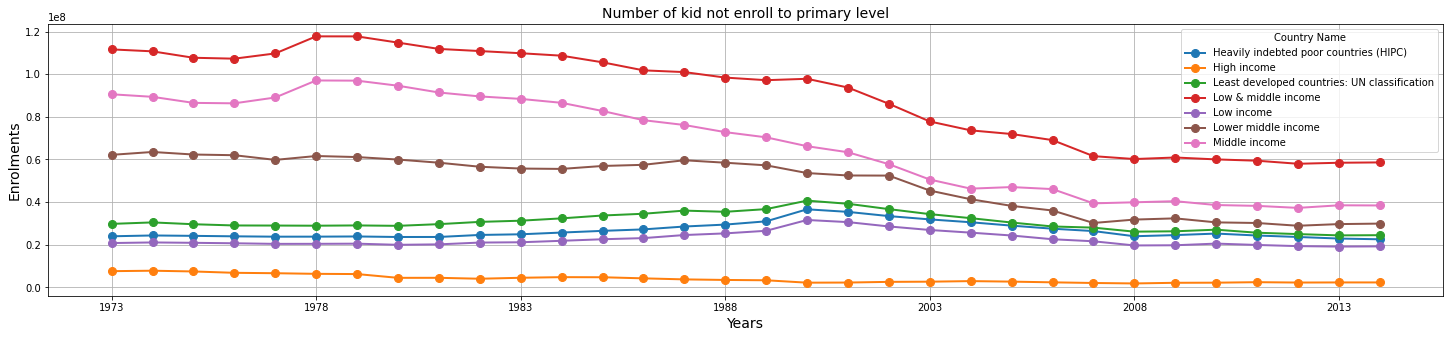

In [ ]:
#Ploting the trend for last few years
plt.rcParams['figure.figsize']=(25,5)
graph_4a.plot(linewidth=2,
    linestyle='-',
    marker='o',markersize=8)
plt.title('Number of kid not enroll to primary level',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolments',fontsize=14)
plt.grid(True)

plt.show()


# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# linestyle :- the style of the lines.
# marker:- used to show a trend or mark an important value.  

#Observation:-


---

1. We can see the no of children out of school in high income countries has always been extremely low.

2. The no of kids out of school in middle income countries has been in a steady decline since 1978. which is a very good sign , as it also tells about economical stabilty and priorities of the people and the goverment. But since the 2007-2008 global slow downn in GDP the number has been in the same place which tells even though markets and GDP is back on track, the improvement in the education sectr has been on a stand still.

3. The number of children out of the school is in a similar range since for the low income and least developed counties, which is a sign of worry.


##***Inferrence*** :- 

1.   Overall trend is downward, which shows the improvement in the enrollment at of kids primary level especially for low and middle icome counteies.
2.  It has been extremenly low for High income group, which shows the high income group favours good education.
3.  The trensd shows for the stagnant behaviour for the number of children out of school at least developed countries and hevaily indepth countries for over the decade which results in poor condition of education and high illliteracy amogst rate in those countries.
4. this poor education and high illitreacy rate results in lack of skilled labours in those countries



---



---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q2. Show the trend at all the level i.e Primary,Secondry and Tertiary for female student

In [ ]:
# first last Thirty years i.e. 1985-2015  - columns.
# for girls enr0llment primary, secondary, and tartiary - indicator code.
# for girls transtition data  p-s and s-t  - indicator code.
# region-wise, income-wise. region name, income-wise

girl_eduction_income=Income_df.copy()
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].dropna()
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2a=girl_education_income_primary.transpose()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# for secondry
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()


In [ ]:
# for tertiary
girl_education_income_tertiary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_tertiary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_tertiary.transpose()


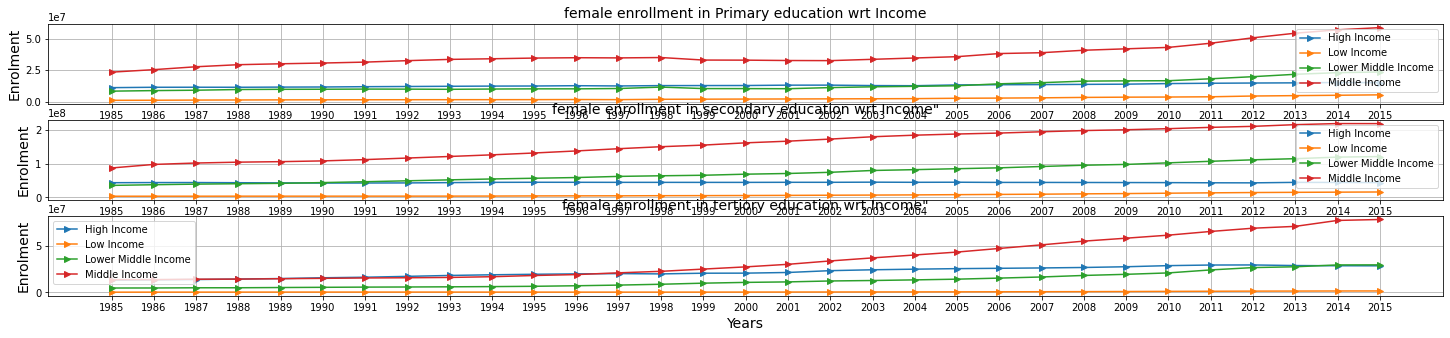

In [ ]:
# Subplotting the chart of all three female enrollment wrt income

plt.subplot(3,1,1)
plt.plot(graph_2a, marker = ">")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in Primary education wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(graph_2b, marker = ">")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in secondary education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(graph_2c,marker = ">")
plt.rcParams['figure.figsize']=(15,15)
plt.legend(['High Income','Low Income','Lower Middle Income','Middle Income'])
plt.title('female enrollment in tertiory education wrt Income"',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolment',fontsize=14)
plt.grid(True)

plt.show()   



# Above function will create and display the graph after successful execution.  
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# marker:- used to show a trend or mark an important value.  

##***Inferrence***

---

---
As we know females too play a great role in contributing towards the labour force of the country. by the following graph we can observe that := 

1.   Number of female getting enrolled in primary, secondry and tertiary level is showing increasing trend in all the income group over the years,it shows the awareness toward the girl education is increasing.  

2. The increse in the participation of females in the tertiory education has been a dream run almost making it a logarithmic graph in positive side.

3. Where as the performance for the middle income country in tertiory level education has left so much to be desired . But middle income countries has done well in primary as well secndry education.

4. The main concerning point has been the low income groups as their numbers are alomst the same they were half a century ago in the tertiary education , with hardly any improvment in primary level education of females too. this results in lack of females skilled labours in these countries.



Q3. Analyse the trend for teacher to  pupil ration over different income group

In [ ]:
#Extracting Data and creating dataframe for the analysis wih indicator code SE.PRM.TCHR.FE.ZS
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)


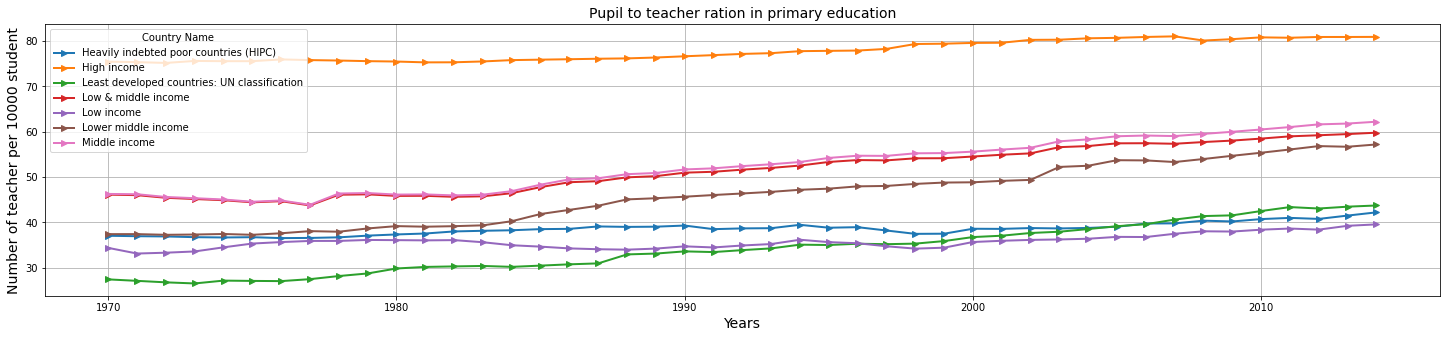

In [ ]:
#Ploting the tredn

plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot(linewidth=2,
    linestyle='-',
    marker='>',markersize=6,grid=True)
plt.title('Pupil to teacher ration in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

# Above function will create and display the graph after successful execution.  
# kind:- Type of graph.
# ylabel and xlabel:- Label of Y-axis and x-axis.
# grid:- 'True' for displaying grid.
# linewidth:- thickness of trend lines.
# linestyle :- the style of the lines.
# marker:- used to show a trend or mark an important value.                

##***Inferrence:-***

1.  The number of teacher are inreasing after 1990 over all the income group. 
2.  we can see that these numbers are extremely low for heavily indepth and lower income countries.
3. A healthy number for the teacher to puplil can be seen in middle income to low income countries
4. Lower student pupil ratio in heavily indepth and least developed countries results in lack of teachers for quality education for pupils and which result in poor development and less number of skilled labour force in these countries



---



---



Q4. Show the correlation of GDP, Unemployment and illiterate labour force

In [ ]:
nn=pd.read_csv(path3)# World,China,India,United States,Germany,Euro area
nn.set_index('Indicator Code',inplace=True)
nn2=nn.loc[['SE.ADT.1524.LT.ZS','NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN'],['Country Name','2010']]
World={'total unemployment':[6.081802e+00,4.200000e+00,3.600000e+00,4.837388e+04,7.000000e+00,1.013016e+01],
      'total illiterate workforce':[3.181296e+09,7.799515e+08,4.706091e+08,1.570211e+08,4.201639e+07,1.614402e+08]}

# Correlation DF
cor=pd.DataFrame(World,index=['World','China','India','United States','Germany','Euro area'])
print(cor) # this is Df

#Making correlation
final_cor=cor.corr()
print(final_cor) # this is correlated df


               total unemployment  total illiterate workforce
World                    6.081802                3.181296e+09
China                    4.200000                7.799515e+08
India                    3.600000                4.706091e+08
United States        48373.880000                1.570211e+08
Germany                  7.000000                4.201639e+07
Euro area               10.130160                1.614402e+08
                            total unemployment  total illiterate workforce
total unemployment                    1.000000                   -0.262447
total illiterate workforce           -0.262447                    1.000000


Text(0.5, 1.0, 'Illetrate work force and total unemployment')

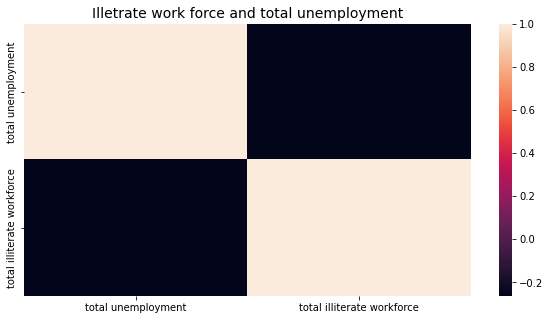

In [ ]:
#making Correleation map
plt.figure(figsize=(10,5))
sns.heatmap(final_cor)
plt.title('Illetrate work force and total unemployment',fontsize=14)


##***Inferrence***

1. As we can observe there is high corelation between unemployment and illitertrate workforce which proves the truity our results that we got from the above graphs.




Q5. Analyse the expenditure on education by the government and its outcome for the big economys of the world.

In [ ]:
# clean data to find Amount of labour force
clean_data1_1=new_data[['Country Name','Indicator Code','1990','2000','2010']]
Sorted1_2=clean_data1_1[clean_data1_1['Indicator Code']=='SL.TLF.TOTL.IN'].set_index(['Country Name'])
Sorted2=Sorted1_2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Sorted2.drop(['Indicator Code'],axis=1,inplace=True)
Sorted3=Sorted2.transpose()
print(Sorted3)


Country Name        India       Japan  United States     Germany  \
1990          327611171.0  63873046.0    127940053.0  38880161.0   
2000          405518817.0  67670439.0    146767633.0  40252431.0   
2010          470609097.0  66665009.0    157021140.0  42016390.0   

Country Name  United Kingdom      Canada      France  
1990              29039812.0  14716537.0  26127625.0  
2000              29295735.0  16235329.0  27479571.0  
2010              32010605.0  18913406.0  29861080.0  


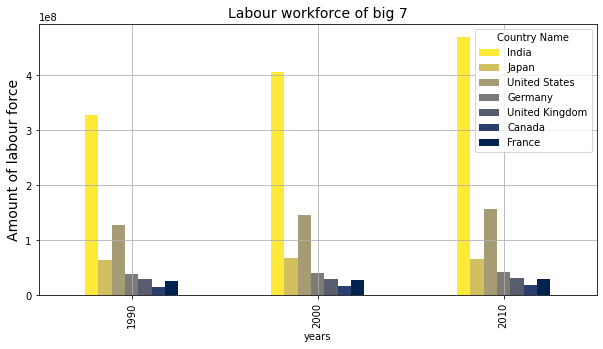

In [ ]:
# Plot bar chart
plt.rcParams['figure.figsize']=(10,5)
Sorted3.plot(kind='bar',colormap= "cividis_r")
plt.grid(True,linewidth=.8)
plt.title('Labour workforce of big 7',fontsize=14)
plt.xlabel('years',fontsize=10)
plt.ylabel('Amount of labour force',fontsize=14)
plt.show()

Observation:-

India being the biggest country in terms of population amongst all the countries listed here have the largest labour workforce. Also, it falls between middle to lower income countries.whicih is the reaon why we have high amount of labour force and large number of this labour force is skilled labour force.

we have seen the positive trend in in middle to lower income countries interms of teacher pupil ratio, female enrollment in primary secondary and tertiary education. Also, kids enrolling in primary education from last 1.5 decade. which is the reson why labour force is incresing in middle to lower income countries like india.

Japan despite having a low population which is aging , the number of people in workforce is still large enough to compare with countries like Germany, France, UK because of thier quality education which is one amongst the best in the world.